In [1]:
### 1A ###
print("--------- 1a) ---------")
import pandas as pd, csv
file = 'locations.csv'
with open(file) as f:
    reader = csv.reader(f) #, delimiter to add delimiter
    header = next(reader) # Getting rid of the header line
    location = [row for row in reader]
location_list = pd.DataFrame(pd.DataFrame(location).values,columns=header)
def get_location_ancestors(location_id):
    result = location_list.loc[(location_list['id'] == location_id)]
    split = result.access_path.str.split('::').item()
    split.pop()
    return_df_value = []
    return_df_header = ['access_path']
    for i in split: 
        x = []
        x.append(i)
        return_df_value.append(x)
    return_df = pd.DataFrame(return_df_value, columns=return_df_header)
    return return_df
print(get_location_ancestors("location_1380"))

print("--------- end ---------")

--------- 1a) ---------
    access_path
0   location_32
1  location_216
--------- end ---------


In [2]:
### 1B ###
print("--------- 1b) ---------")

def get_location_descendants(location_id):
    result = pd.DataFrame(location_list['access_path'])
    result = result[result.access_path.str.contains(location_id)]
    return_df_value = []
    return_df_header = ['access_path']
    for i, row in result.iterrows():
        split = row['access_path'].split('::')
        x = []
        x.append(split[-1])
        return_df_value.append(x)
    return_df = pd.DataFrame(return_df_value, columns=return_df_header)
    return return_df

print(get_location_descendants("location_32"))
print(get_location_descendants("location_216"))
print(get_location_descendants("location_1380"))

print("--------- end ---------")

--------- 1b) ---------
      access_path
0     location_32
1    location_213
2    location_214
3    location_215
4    location_216
5   location_1357
6   location_1358
7   location_1359
8   location_1360
9   location_1361
10  location_1362
11  location_1363
12  location_1364
13  location_1365
14  location_1366
15  location_1367
16  location_1368
17  location_1369
18  location_1370
19  location_1371
20  location_1372
21  location_1373
22  location_1374
23  location_1375
24  location_1376
25  location_1377
26  location_1378
27  location_1379
28  location_1380
29  location_1381
30  location_1382
31  location_1383
32  location_1384
33  location_1385
34  location_1386
35  location_1387
36  location_1388
37  location_1389
38  location_1390
39  location_1391
40  location_1392
      access_path
0    location_216
1   location_1380
2   location_1381
3   location_1382
4   location_1383
5   location_1384
6   location_1385
7   location_1386
8   location_1387
9   location_1388
10  location_1389
11  

In [648]:
import igraph
from igraph import Graph, EdgeSeq

#calculating number of unique location
nr_vertices = location_list['id'].tolist()
v_label = nr_vertices
#get the direct relationship between location
add_to_edge = []
for i in nr_vertices:
    if not get_location_ancestors(i).empty:
        edges = (nr_vertices.index(get_location_ancestors(i)['access_path'].iloc[-1]), nr_vertices.index(i))
        add_to_edge.append(edges)
G = Graph()
G.add_vertices(len(nr_vertices))
G.add_edges(add_to_edge)
lay = G.layout_reingold_tilford(root=[0])

position = {k: lay[k] for k in range(len(nr_vertices))}
Y = [lay[k][1] for k in range(len(nr_vertices))]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]
labels = v_label

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=Xe, y=Ye, mode='lines', line=dict(color='rgb(210,210,210)', width=1), hoverinfo='none'))
fig.add_trace(go.Scatter(x=Xn, y=Yn, mode='markers', name='Location', marker=dict(symbol='circle-dot', size=25, color='#6175c1',
                            line=dict(color='rgb(50,50,50)', width=1)), text=labels, hoverinfo='text', opacity=0.8 ))
                            
def make_annotations(pos, text, font_size=5, font_color='rgb(250,250,250)'):
    L=len(pos)
    if len(text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = []
    for k in range(L):
        annotations.append(
            dict(
                text=labels[k], # or replace labels with a different list for the text within the circle
                x=pos[k][0], y=2*M-position[k][1],
                xref='x1', yref='y1',
                font=dict(color=font_color, size=font_size),
                showarrow=False))
    return annotations
# hide axis line, grid, ticklabels and  title
axis = dict(showline=False, zeroline=False, showgrid=False, showticklabels=False,)

fig.update_layout(title= 'Tree graph', annotations=make_annotations(position, v_label),
              font_size=12, showlegend=False, xaxis=axis, yaxis=axis, margin=dict(l=40, r=40, b=85, t=100),
              hovermode='closest', plot_bgcolor='rgb(248,248,248)')
fig.show()

In [649]:
### 1d ###
print("--------- 1d) ---------")

file = 'granted_permissions.csv'
with open(file) as f:
    reader = csv.reader(f) #, delimiter to add delimiter
    header = next(reader) # Getting rid of the header line
    task = [row for row in reader]
gp_list = pd.DataFrame(pd.DataFrame(task).values,columns=header)
for i, row in gp_list.iterrows(): #loop through granted permission
    user_id_gl = get_location_descendants(row['access_path']) #Use Q1b func to get descendants
    user_id_gl['user_id'] = row['user_id'] #assign user_id to descendants
    #merge using descendants and location ID
    user_id_gl = location_list.merge(user_id_gl, left_on="id", right_on="access_path")
    user_id_gl.columns = ['id', 'name', 'access_path', 'extra', 'user_id'] #renaming columns
    user_id_gl.drop(user_id_gl.columns[[3]], axis=1, inplace=True) #remove the x and y access_path
    print(user_id_gl)
    
print("--------- end ---------")

--------- 1d) ---------
               id                                               name  \
0     location_32  77201 Smith Stravenue Suite 983\nObrienberg, P...   
1    location_213            378 Jones Mews\nNorth Jeffery, SD 71493   
2    location_214  8091 Frederick Burgs Apt. 413\nNorth Georgelan...   
3    location_215  38989 Smith Courts Apt. 936\nWest Leslie, LA 7...   
4    location_216  638 Singh Locks Suite 427\nWest Theresa, MI 10446   
5   location_1357            654 Mitchell Keys\nWebermouth, WA 55621   
6   location_1358  20806 Duffy Mountain Apt. 550\nLake Bonnieside...   
7   location_1359  486 Amanda Forges Apt. 920\nMeyerchester, WV 0...   
8   location_1360             72342 Fox Course\nAdamsshire, NH 16380   
9   location_1361   36483 Barnes Glens Apt. 206\nHeathland, DE 87320   
10  location_1362       56446 Benitez Junction\nKarinaberg, MT 88565   
11  location_1363  1038 Glass Common Apt. 584\nGregorymouth, ND 5...   
12  location_1364      434 Williams Stat

In [650]:
### 1e ###
print("--------- 1e) ---------")

file = 'meetings.csv'
with open(file) as f:
    reader = csv.reader(f) #, delimiter to add delimiter
    header = next(reader) # Getting rid of the header line
    task = [row for row in reader]
meetings_list = pd.DataFrame(pd.DataFrame(task).values,columns=header)
#print(meetings_list)

def read_meetings(user_id):
    for i, row in gp_list.iterrows(): #loop through granted permission
        user_id_gl = get_location_descendants(row['access_path']) #Use Q1b func to get descendants
        user_id_gl['user_id'] = row['user_id'] #assign user_id to descendants
    user_id_gl = meetings_list.merge(user_id_gl, left_on="location_id", right_on="access_path")
    user_id_gl = user_id_gl[['id']]
    return(user_id_gl)

print(read_meetings("user_0000000009"))

print("--------- end ---------")

--------- 1e) ---------
                                         id
0      14865b22-7c4b-4ed2-98bf-e1d3aa685960
1      c33ab3d5-b24a-4b3b-b868-972b890202a2
2      7d0ccadb-44ce-402e-a880-7a4ac477623b
3      d87ca01f-6f0a-4442-990c-40c74cf99cc2
4      4392f1ce-dac3-4afb-89a0-d37f11221815
...                                     ...
21088  0476a7be-57d2-46c1-bde0-4b3e49a8958e
21089  e76ae220-f2ab-4bbd-8262-f5e22926a805
21090  653cd126-92c5-447c-aab0-70e90e59986a
21091  82141ec0-2fbb-486e-8f84-932407504571
21092  4116438f-2d51-491e-899c-10396c66811d

[21093 rows x 1 columns]
--------- end ---------


In [651]:
### 1f ###
print("--------- 1f) Preparing data ---------")

from sqlalchemy import *

engine = create_engine('sqlite:///mobile.sqlite', echo=False)

location_list.to_sql('locations_table', con=engine, if_exists='replace')
gp_list.to_sql('granted_permission_table', con=engine, if_exists='replace')
meetings_list.to_sql('meetings_table', con=engine, if_exists='replace')

print("--------- end ---------")

--------- 1f) Preparing data ---------
--------- end ---------


In [652]:
### 1f i ###
print("--------- 1f i)  Q1(a)---------")

def get_location_ancestors_SQL(location_id):
    query = engine.execute("SELECT access_path FROM locations_table where access_path like ?", "%"+location_id)
    for i in query: 
        for o in i: #Technically each ID only has a unique set of ancestors hence returning result on the first record
            return_set = o.split("::")
            return_set.pop()
            return(return_set)

print(get_location_ancestors_SQL("location_1380"))

print("--------- end ---------")

--------- 1f i)  Q1(a)---------
['location_32', 'location_216']
--------- end ---------


In [653]:
### 1f ii ###
print("--------- 1f ii)  Q1(b)---------")

def get_location_descendants_SQL(location_id):
    query = engine.execute("SELECT access_path FROM locations_table where access_path like ?", "%"+location_id+"%")
    return_set = []
    for i in query: 
        for o in i: 
            return_set_add = o.split("::")
            return_set.append(return_set_add[-1])
    return(return_set) #return descendants once all loop is complete

print(get_location_descendants_SQL("location_32"))
print(get_location_descendants_SQL("location_216"))
print(get_location_descendants_SQL("location_1380"))

print("--------- end ---------")

--------- 1f ii)  Q1(b)---------
['location_32', 'location_213', 'location_214', 'location_215', 'location_216', 'location_1357', 'location_1358', 'location_1359', 'location_1360', 'location_1361', 'location_1362', 'location_1363', 'location_1364', 'location_1365', 'location_1366', 'location_1367', 'location_1368', 'location_1369', 'location_1370', 'location_1371', 'location_1372', 'location_1373', 'location_1374', 'location_1375', 'location_1376', 'location_1377', 'location_1378', 'location_1379', 'location_1380', 'location_1381', 'location_1382', 'location_1383', 'location_1384', 'location_1385', 'location_1386', 'location_1387', 'location_1388', 'location_1389', 'location_1390', 'location_1391', 'location_1392']
['location_216', 'location_1380', 'location_1381', 'location_1382', 'location_1383', 'location_1384', 'location_1385', 'location_1386', 'location_1387', 'location_1388', 'location_1389', 'location_1390', 'location_1391', 'location_1392']
['location_1380']
--------- end -----

In [654]:
### 1f iii ###
print("--------- 1f iii)  Q1(d)---------")

query = engine.execute("""SELECT loc.id, loc.name, loc.access_path, gp.user_id
                            FROM locations_table loc
                            inner join granted_permission_table gp
                            on loc.access_path like gp.access_path||'%'
                            order by gp.user_id
                            """)
for i in query: 
    print(i)

print("--------- end ---------")

--------- 1f iii)  Q1(d)---------
('location_32', '77201 Smith Stravenue Suite 983\nObrienberg, PA 50900', 'location_32', 'user_0000000000')
('location_213', '378 Jones Mews\nNorth Jeffery, SD 71493', 'location_32::location_213', 'user_0000000000')
('location_214', '8091 Frederick Burgs Apt. 413\nNorth Georgeland, AK 53344', 'location_32::location_214', 'user_0000000000')
('location_215', '38989 Smith Courts Apt. 936\nWest Leslie, LA 72153', 'location_32::location_215', 'user_0000000000')
('location_216', '638 Singh Locks Suite 427\nWest Theresa, MI 10446', 'location_32::location_216', 'user_0000000000')
('location_216', '638 Singh Locks Suite 427\nWest Theresa, MI 10446', 'location_32::location_216', 'user_0000000000')
('location_1357', '654 Mitchell Keys\nWebermouth, WA 55621', 'location_32::location_213::location_1357', 'user_0000000000')
('location_1358', '20806 Duffy Mountain Apt. 550\nLake Bonnieside, OK 11766', 'location_32::location_213::location_1358', 'user_0000000000')
('loc

In [655]:
### 1f iv ###
print("--------- 1f iv)  Q1(e)---------")

def read_meetings_SQL(user_id):
    query = engine.execute("""select meeting.id
                            from meetings_table meeting,
                                (SELECT loc.id, loc.name, loc.access_path, gp.user_id
                                FROM locations_table loc
                                inner join granted_permission_table gp
                                on loc.access_path like gp.access_path||'%'
                                where gp.user_id = ?
                                order by gp.user_id) gplist
                            where meeting.location_id = gplist.id
                                """, user_id)
    return_set = []
    for i in query: 
        return_set.append(i[0])
    return(return_set) #return once loop finish

#commented as there are alot of records
#print(read_meetings_SQL("user_0000000009"))

print("--------- end ---------")

--------- 1f iv)  Q1(e)---------
--------- end ---------


In [656]:
### 2a ###
print("--------- 2a) ---------")

import requests
from bs4 import BeautifulSoup
from datetime import datetime

user_agent = {'User-agent': 'Mozilla/5.0'}

url = 'https://en.wikipedia.org/w/index.php?title=List_of_Singapore_MRT_stations&oldid=1094758210'
page = requests.get(url, headers = user_agent)
soup = BeautifulSoup(page.content)
table = soup.find('table', {'class':'wikitable sortable'}) # Look for the table with class 'wikitable sortable'
mrt_line_record = ""
opening = ""
openingRowCount = 0
openingOriginalCount = 0
df_data_holder = []
for i in table.findAll('tr')[2:]: #Run through all TR 
    columns = i.find_all('td')
    for i in columns: 
        if i.get('rowspan') is not None: #Check any TD has rowspan. if yes, assign accordingly to counter
            if columns.index(i) == 4: 
                openingRowCount = int(i.get('rowspan'))
                openingOriginalCount = int(i.get('rowspan'))
    insert_set = []
    #check against counter and if detected missing column, add in previous date column (based on rowspan)
    if openingRowCount != openingOriginalCount and openingRowCount > 0: columns.insert(4,opening)
    if(len(columns) == 1): mrt_line_record = columns[0].text.strip() #mrt_line
    if(len(columns) > 4): #anything above 4 is a mrt station row
        if isinstance(columns[4], str): opening = columns[4].replace('[19]','').strip()
        else: opening = columns[4].text.replace('[19]','').strip()
        try:
            if bool(datetime.strptime(opening, "%d %B %Y")):
                insert_set.append(columns[0].text.replace(u'\xa0', u' ').replace(' – ','  ').replace('Infill station','').strip().replace('  ', ', '))
                insert_set.append(columns[1].text.strip())
                insert_set.append(opening)
                insert_set.append(columns[6].text.strip())
                insert_set.append(mrt_line_record)
                df_data_holder.append(insert_set)
        except ValueError: None
    if openingRowCount >= 0: openingRowCount -= 1

mrt_station = pd.DataFrame(df_data_holder, columns=['alpha_numeric_codes', 'name', 'opening', 'abbreviation', 'mrt_line'])
print(mrt_station)

print("--------- end ---------")

--------- 2a) ---------
    alpha_numeric_codes           name           opening abbreviation  \
0             NS1, EW24    Jurong East     10 March 1990          JUR   
1                   NS2    Bukit Batok     10 March 1990          BBT   
2                   NS3   Bukit Gombak     10 March 1990          BGB   
3              NS4, BP1  Choa Chu Kang     10 March 1990          CCK   
4                   NS5        Yew Tee  10 February 1996          YWT   
..                  ...            ...               ...          ...   
146                 TE5         Lentor    28 August 2021          LTR   
147                 TE6      Mayflower    28 August 2021          MFL   
148                 TE7    Bright Hill    28 August 2021          BRH   
149                 TE8  Upper Thomson    28 August 2021          UTS   
150           TE9, CC17      Caldecott    28 August 2021          CDT   

                          mrt_line  
0           North South Line (NSL)  
1           North South L

--------- 2b) ---------
--------- end ---------


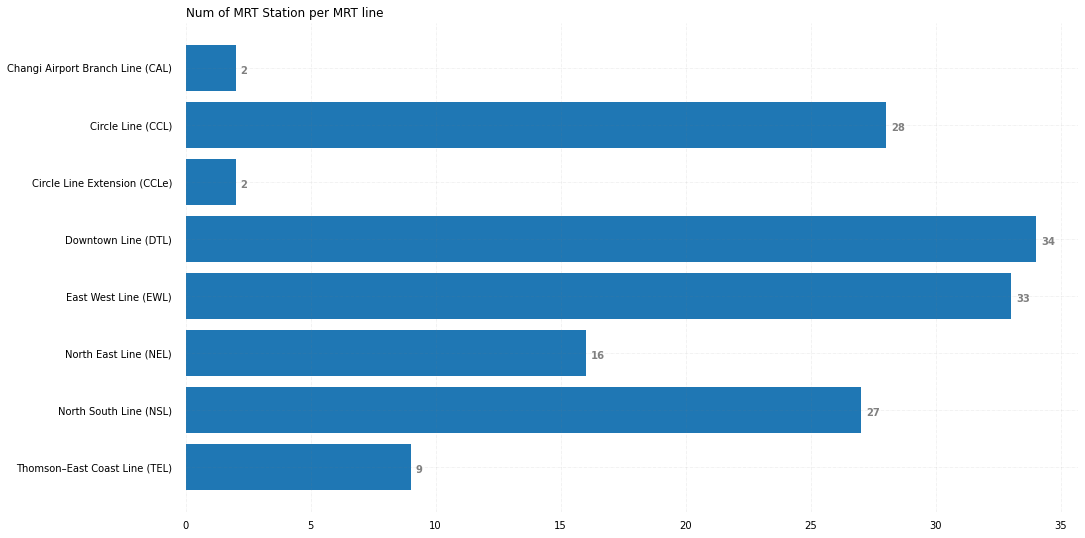

In [657]:
### 2b ###
print("--------- 2b) ---------")

%matplotlib inline
import matplotlib.pyplot as plt
#team_memberships = team_memberships.astype(int).sort_values("team_id", axis = 0, ascending = True)
mrt_station_gb = (mrt_station.groupby(['mrt_line']).count().reset_index())
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mrt_station_gb['mrt_line'], mrt_station_gb['abbreviation'])
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title('Num of MRT Station per MRT line', loc ='left', )

print("--------- end ---------")

In [658]:
### 2c ###
print("--------- 2c) ---------")

df_data_holder = []
for i, row in mrt_station.iterrows():
    alpha_first_occ = row['alpha_numeric_codes'].split(", ")[0] #Get the first Alpha Code
    insert_set = []
    insert_set.append(alpha_first_occ[:2])
    insert_set.append(int(alpha_first_occ[2:]))
    insert_set.append(row['abbreviation'])
    insert_set.append(row['mrt_line'])
    df_data_holder.append(insert_set)
df_custom = pd.DataFrame(df_data_holder, columns=['alpha_numeric_codes', 'alpha_numeric_codes_No', 'abbreviation', 'mrt_line'])
df_custom = df_custom.sort_values(by = ['alpha_numeric_codes', 'alpha_numeric_codes_No'], ascending = [True, True])

df_data_holder = []
df_custom_prev = []
for i, row in df_custom.iterrows():
    insert_set = []
    if len(df_custom_prev) == 0:
        df_custom_prev.append(row['alpha_numeric_codes'])
        df_custom_prev.append(row['alpha_numeric_codes_No'])
        df_custom_prev.append(row['abbreviation'])
        df_custom_prev.append(row['mrt_line'])
    else:
        if df_custom_prev[0] == row['alpha_numeric_codes'] and df_custom_prev[1]+1 == row['alpha_numeric_codes_No']:
            insert_set.append(df_custom_prev[2])
            insert_set.append(row['abbreviation'])
            insert_set.append(df_custom_prev[3])
            df_data_holder.append(insert_set)
            insert_set = []
            insert_set.append(row['abbreviation'])
            insert_set.append(df_custom_prev[2])
            insert_set.append(row['mrt_line'])
            df_data_holder.append(insert_set)
            df_custom_prev = []
            df_custom_prev.append(row['alpha_numeric_codes'])
            df_custom_prev.append(row['alpha_numeric_codes_No'])
            df_custom_prev.append(row['abbreviation'])
            df_custom_prev.append(row['mrt_line'])
        else:
            df_custom_prev = []
            df_custom_prev.append(row['alpha_numeric_codes'])
            df_custom_prev.append(row['alpha_numeric_codes_No'])
            df_custom_prev.append(row['abbreviation'])
            df_custom_prev.append(row['mrt_line'])

station_pair = pd.DataFrame(df_data_holder, columns=['From', 'to', 'mrt_line'])
print(station_pair)

print("--------- end ---------")

--------- 2c) ---------
    From   to                       mrt_line
0    DBG  BBS              Circle Line (CCL)
1    BBS  DBG              Circle Line (CCL)
2    BBS  EPN              Circle Line (CCL)
3    EPN  BBS              Circle Line (CCL)
4    EPN  PMN              Circle Line (CCL)
..   ...  ...                            ...
273  BRH  MFL  Thomson–East Coast Line (TEL)
274  BRH  UTS  Thomson–East Coast Line (TEL)
275  UTS  BRH  Thomson–East Coast Line (TEL)
276  UTS  CDT  Thomson–East Coast Line (TEL)
277  CDT  UTS  Thomson–East Coast Line (TEL)

[278 rows x 3 columns]
--------- end ---------


In [659]:
### 2d ###
print("--------- 2d) ---------")

def get_shortest_travel_path(from_station, to_station):
    travel_path = [from_station]
    filtered_from_station = station_pair[(station_pair.From == from_station)]
    #To add all combi into a path_dict
    path_dict = {}
    for i in station_pair.From.unique():
        filtered_from_station = station_pair[(station_pair.From == i)]
        #create a set type variable to insert value
        path_dict_set = set()
        for o, row in filtered_from_station.iterrows():
            path_dict_set.add(row['to'])
        path_dict[i] = path_dict_set
    #Add this path from Tanah Merah to Expo. to capture connection in the real world 
    # and the website did not link under the Changi Airport Branch Line (CAL)
    # this will allow shorter path
    path_dict["TNM"].add("XPO")

    path_list = [[from_station]]
    path_index = 0
    # To keep track of previously visited nodes
    previous_nodes = {from_station}
    if from_station == to_station:
        return path_list[0]        
    while path_index < len(path_list):
        current_path = path_list[path_index]
        last_node = current_path[-1]
        next_nodes = path_dict[last_node]
        # Search goal node
        if to_station in next_nodes:
            current_path.append(to_station)
            return current_path
        # Add new paths
        for next_node in next_nodes:
            if not next_node in previous_nodes:
                new_path = current_path[:]
                new_path.append(next_node)
                path_list.append(new_path)
                # To avoid backtracking
                previous_nodes.add(next_node)
        # Continue to next path in list
        path_index += 1
    # No path is found
    return []

print(get_shortest_travel_path("WDL","CGA"))
print("--------- end ---------")

--------- 2d) ---------
['WDL', 'ADM', 'SBW', 'CBR', 'YIS', 'KTB', 'YCK', 'AMK', 'BSH', 'LRC', 'SER', 'BLY', 'TSG', 'MPS', 'PYL', 'EUN', 'KEM', 'BDK', 'TNM', 'XPO', 'CGA']
--------- end ---------
